# Capstone Three: Predicting Cancer Using A Convolutional Neural Network

Gabe Gibitz

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import shutil

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

### DATA COLLECTION & PROCESSING

I chose a data set of more than 200,000 images, all cropped to 50x50 in RGB. 

Images, in the eyes of a computer, are simply a list of numbers. This means that each image in my set has three layers, the R, the G and the B. Each of these layers is given a number. The data came from 162 slides that were scanned at 40x.

These images were divided into dozens of folders, each having a '0' folder and a '1' folder. The 0 folder contained images with no cancerous cells, while the 1 folder contained images that were cancerous.

Most of the hard work was done, but I needed to aggregate all images into two folders:
1. Folder 0
2. Folder 1

Let's use Python to do this!

In [2]:
patients = os.listdir('data/raw_data')

In [3]:
os.listdir('data/raw_data/9036/0')

['9036_idx5_x1051_y2401_class0.png',
 '9036_idx5_x2951_y951_class0.png',
 '9036_idx5_x3001_y1451_class0.png',
 '9036_idx5_x3051_y801_class0.png',
 '9036_idx5_x951_y1901_class0.png',
 '9036_idx5_x2251_y751_class0.png',
 '9036_idx5_x1901_y401_class0.png',
 '9036_idx5_x3201_y1101_class0.png',
 '9036_idx5_x3351_y1251_class0.png',
 '9036_idx5_x2051_y2551_class0.png',
 '9036_idx5_x1051_y2301_class0.png',
 '9036_idx5_x1101_y2051_class0.png',
 '9036_idx5_x1751_y651_class0.png',
 '9036_idx5_x2001_y701_class0.png',
 '9036_idx5_x3001_y1351_class0.png',
 '9036_idx5_x3151_y1001_class0.png',
 '9036_idx5_x1601_y2851_class0.png',
 '9036_idx5_x1901_y301_class0.png',
 '9036_idx5_x2051_y2251_class0.png',
 '9036_idx5_x3201_y851_class0.png',
 '9036_idx5_x1101_y651_class0.png',
 '9036_idx5_x2301_y1301_class0.png',
 '9036_idx5_x2251_y1051_class0.png',
 '9036_idx5_x2651_y701_class0.png',
 '9036_idx5_x1101_y1701_class0.png',
 '9036_idx5_x1051_y1451_class0.png',
 '9036_idx5_x2051_y1501_class0.png',
 '9036_idx5_

In [4]:
patients.remove('.DS_Store')

In [5]:
'''#For 0 folder:
for folder in patients:
    imagelist = os.listdir('data/raw_data/{}/0'.format(folder))
    for image in imagelist:
        shutil.copyfile('data/raw_data/{}/0/{}'.format(folder, image), 'data/0/{}'.format(image))'''

"#For 0 folder:\nfor folder in patients:\n    imagelist = os.listdir('data/raw_data/{}/0'.format(folder))\n    for image in imagelist:\n        shutil.copyfile('data/raw_data/{}/0/{}'.format(folder, image), 'data/0/{}'.format(image))"

In [6]:
'''#For 1 folder:
for folder in patients:
    imagelist = os.listdir('data/raw_data/{}/1'.format(folder))
    for image in imagelist:
        shutil.copyfile('data/raw_data/{}/1/{}'.format(folder, image), 'data/1/{}'.format(image))'''

"#For 1 folder:\nfor folder in patients:\n    imagelist = os.listdir('data/raw_data/{}/1'.format(folder))\n    for image in imagelist:\n        shutil.copyfile('data/raw_data/{}/1/{}'.format(folder, image), 'data/1/{}'.format(image))"

### PRE-PROCESSING

TRAINING DATA

Let's first try our hand on some training data before we jump straight into the entire dataset.

In [8]:
#Create the dataframe.
import cv2

file_list = []
class_list = []

DATADIR = "data/sample"

# All the categories you want your neural network to detect
CATEGORIES = ["0", "1"]

# The size of the images that your neural network will use
IMG_SIZE = 50

# Checking for all images in the data folder
# Let's use black and white for the images to save on computing power.
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

sample_training_data = []

def create_sample_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                sample_training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_sample_training_data()

In [9]:
sample_training_data

[[array([[200, 200, 194, ..., 132, 155, 157],
         [162, 189, 179, ..., 178, 196, 187],
         [151, 170, 164, ..., 157, 161, 163],
         ...,
         [186, 205, 200, ..., 159, 167, 186],
         [207, 174, 188, ..., 170, 166, 196],
         [241, 236, 242, ..., 166, 159, 188]], dtype=uint8),
  0],
 [array([[175, 157, 168, ..., 162, 151, 161],
         [155, 174, 166, ..., 149, 165, 160],
         [164, 146, 143, ..., 151, 161, 174],
         ...,
         [243, 243, 242, ..., 242, 242, 242],
         [243, 243, 242, ..., 242, 241, 241],
         [243, 243, 243, ..., 241, 241, 241]], dtype=uint8),
  0],
 [array([[241, 241, 240, ..., 106, 147, 124],
         [240, 239, 242, ...,  81, 132, 136],
         [242, 239, 241, ...,  83, 111,  88],
         ...,
         [173, 221, 241, ..., 144, 113, 136],
         [241, 241, 240, ..., 236, 218, 213],
         [241, 237, 235, ..., 242, 240, 239]], dtype=uint8),
  0],
 [array([[218, 234, 242, ..., 199, 239, 241],
         [219, 236, 2

In [10]:
#Let's make sure the array still represents the images.
#cv2.imshow('image', sample_training_data[0][0])
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [11]:
df_sample = pd.DataFrame(sample_training_data)

In [12]:
df_sample.shape

(979, 2)

In [13]:
df_sample.tail()

,0,1
974,"[[102, 108, 127, 127, 118, 118, 125, 161, 107,...",1
975,"[[91, 89, 97, 172, 231, 224, 175, 112, 76, 79,...",1
976,"[[93, 102, 94, 130, 81, 75, 92, 82, 95, 87, 84...",1
977,"[[101, 115, 91, 125, 78, 58, 53, 80, 99, 116, ...",1
978,"[[85, 124, 110, 105, 92, 130, 153, 138, 125, 1...",1


In [14]:
import random
random.shuffle(sample_training_data)

X_sample = [] #features
y_sample = [] #labels

for features, label in sample_training_data:
    X_sample.append(features)
    y_sample.append(label)

In [15]:
X_sample = np.array(X_sample).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_sample = np.array(y_sample).reshape(-1)

In [16]:
print(X_sample.shape)
print(y_sample.shape)

(979, 50, 50, 1)
(979,)


In [17]:
### MODELING

In [18]:
#Normalize:
X_sample = X_sample/255

#Build the model.
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = X_sample.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
model.add(Dense(2))
model.add(Activation("softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
#Time to fit the model.
sample_fit = model.fit(X_sample, y_sample, batch_size=32, epochs=100, validation_split=0.1)

Train on 881 samples, validate on 98 samples
Epoch 1/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0491 - acc: 0.9875 - val_loss: 0.4622 - val_acc: 0.8878
Epoch 2/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0401 - acc: 0.9841 - val_loss: 0.5238 - val_acc: 0.8980
Epoch 3/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0434 - acc: 0.9886 - val_loss: 0.4652 - val_acc: 0.8776
Epoch 4/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0292 - acc: 0.9898 - val_loss: 0.5253 - val_acc: 0.8878
Epoch 5/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0373 - acc: 0.9875 - val_loss: 0.6212 - val_acc: 0.8265
Epoch 6/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.1138 - acc: 0.9614 - val_loss: 0.4681 - val_acc: 0.8265
Epoch 7/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0896 - acc: 0.9659 - val_loss: 0.3949 - val_acc: 0.8980
Epoch 8/10

Epoch 61/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.7760 - val_acc: 0.8878
Epoch 62/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.8499 - val_acc: 0.8776
Epoch 63/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0038 - acc: 0.9977 - val_loss: 0.9262 - val_acc: 0.8776
Epoch 64/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0635 - acc: 0.9841 - val_loss: 0.8555 - val_acc: 0.8469
Epoch 65/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0789 - acc: 0.9694 - val_loss: 0.9076 - val_acc: 0.8469
Epoch 66/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0440 - acc: 0.9852 - val_loss: 0.6339 - val_acc: 0.8878
Epoch 67/100
881/881 [==============================] - 1s 1ms/sample - loss: 0.0095 - acc: 0.9989 - val_loss: 0.6874 - val_acc: 0.9184
Epoch 68/100
881/881 [==========================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


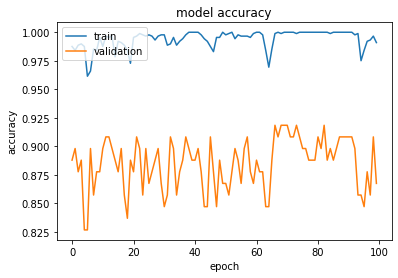

In [24]:
print(sample_fit.history.keys())
plt.figure(1)
plt.plot(sample_fit.history['acc'])
plt.plot(sample_fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Everything looks good from here. I'm not going to worry about the accuracy since the data it was trained on was so small. 

On to the real data!

In [27]:
#Create the dataframe.
import cv2

file_list = []
class_list = []

DATADIR = "data"

# All the categories you want your neural network to detect
CATEGORIES = ["0", "1"]

# The size of the images that your neural network will use
IMG_SIZE = 50

# Checking for all images in the data folder
# Let's use black and white for the images to save on computing power.
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [28]:
import random
random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

In [31]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y).reshape(-1)

print(X.shape)
print(y.shape)

(277524, 50, 50, 1)
(277524,)


In [32]:
#Normalize:
X = X/255

#Build the model.
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
#Time to fit the model.
fit = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Train on 249771 samples, validate on 27753 samples
Epoch 1/10
249771/249771 [==============================] - 274s 1ms/sample - loss: 0.4405 - acc: 0.8016 - val_loss: 0.4128 - val_acc: 0.8154
Epoch 2/10
249771/249771 [==============================] - 279s 1ms/sample - loss: 0.4159 - acc: 0.8160 - val_loss: 0.4634 - val_acc: 0.7809
Epoch 3/10
249771/249771 [==============================] - 277s 1ms/sample - loss: 0.4055 - acc: 0.8214 - val_loss: 0.4184 - val_acc: 0.8168
Epoch 4/10
249771/249771 [==============================] - 276s 1ms/sample - loss: 0.3976 - acc: 0.8252 - val_loss: 0.3908 - val_acc: 0.8294
Epoch 5/10
249771/249771 [==============================] - 283s 1ms/sample - loss: 0.3903 - acc: 0.8286 - val_loss: 0.3928 - val_acc: 0.8315
Epoch 6/10
249771/249771 [==============================] - 265s 1ms/sample - loss: 0.3855 - acc: 0.8304 - val_loss: 0.3824 - val_acc: 0.8327
Epoch 7/10
249771/249771 [==============================] - 274s 1ms/sample - loss: 0.3810 - acc:

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


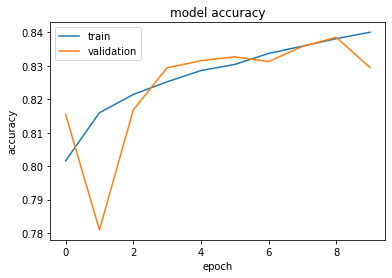

In [36]:
print(fit.history.keys())
plt.figure(1)
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [21]:
### CONCLUSIONS